In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_classif,VarianceThreshold
from sklearn.base import TransformerMixin , BaseEstimator
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.describe(include=["O"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
l=["age","bmi","children","charges"]

In [7]:
discrete=data.select_dtypes(include=["int64"]).columns
discrete

Index(['age', 'children'], dtype='object')

In [8]:
continous=data.select_dtypes(include=["float64"]).columns
continous

Index(['bmi', 'charges'], dtype='object')

In [9]:
objected=data.select_dtypes("object").columns
objected

Index(['sex', 'smoker', 'region'], dtype='object')

<Axes: xlabel='age', ylabel='Density'>

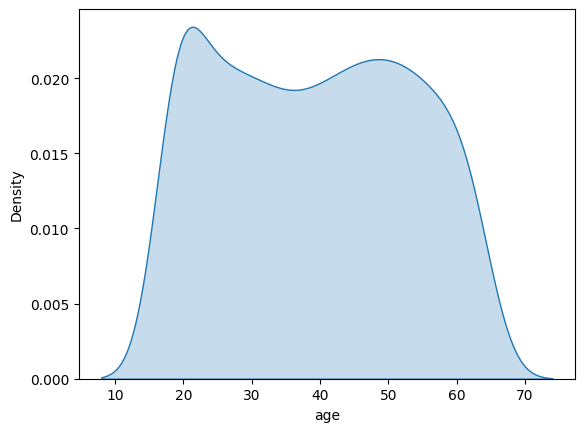

In [10]:
sns.kdeplot(data["age"],fill=True)

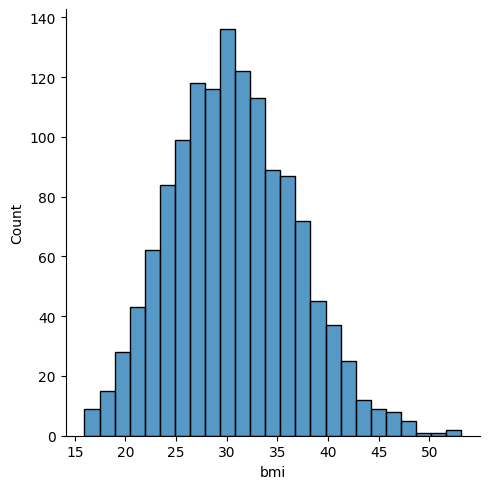

In [11]:
sns.displot(data["bmi"])

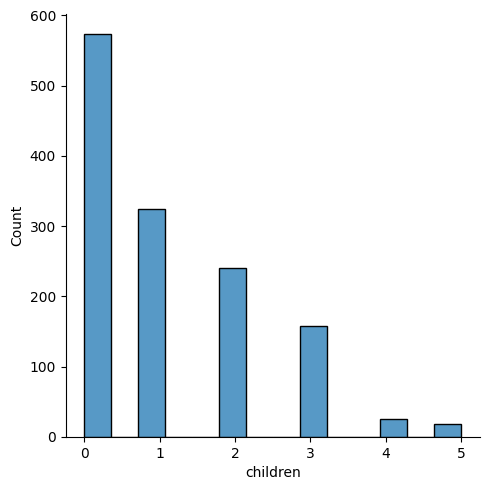

In [12]:
sns.displot(data["children"])

<Axes: xlabel='sex'>

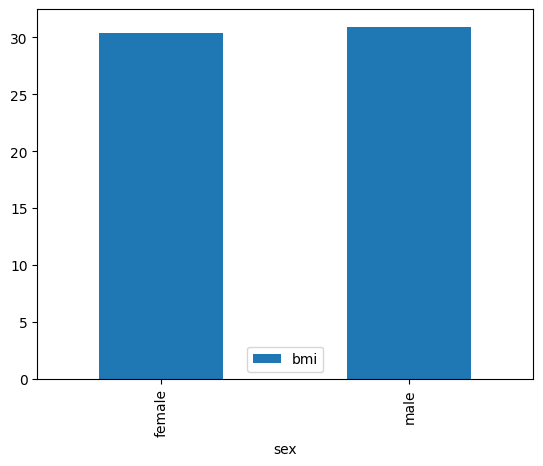

In [13]:
data.groupby(["sex"])["bmi"].mean().sort_values(ascending=True).plot(kind="bar",legend=True)

<Axes: ylabel='charges'>

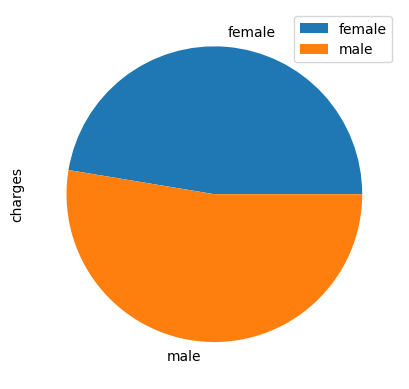

In [14]:
data.groupby(["sex"])["charges"].mean().sort_values(ascending=True).plot(kind="pie",legend=True)

age
18    Axes(0.125,0.11;0.775x0.77)
19    Axes(0.125,0.11;0.775x0.77)
20    Axes(0.125,0.11;0.775x0.77)
21    Axes(0.125,0.11;0.775x0.77)
22    Axes(0.125,0.11;0.775x0.77)
23    Axes(0.125,0.11;0.775x0.77)
24    Axes(0.125,0.11;0.775x0.77)
25    Axes(0.125,0.11;0.775x0.77)
26    Axes(0.125,0.11;0.775x0.77)
27    Axes(0.125,0.11;0.775x0.77)
28    Axes(0.125,0.11;0.775x0.77)
29    Axes(0.125,0.11;0.775x0.77)
30    Axes(0.125,0.11;0.775x0.77)
31    Axes(0.125,0.11;0.775x0.77)
32    Axes(0.125,0.11;0.775x0.77)
33    Axes(0.125,0.11;0.775x0.77)
34    Axes(0.125,0.11;0.775x0.77)
35    Axes(0.125,0.11;0.775x0.77)
36    Axes(0.125,0.11;0.775x0.77)
37    Axes(0.125,0.11;0.775x0.77)
38    Axes(0.125,0.11;0.775x0.77)
39    Axes(0.125,0.11;0.775x0.77)
40    Axes(0.125,0.11;0.775x0.77)
41    Axes(0.125,0.11;0.775x0.77)
42    Axes(0.125,0.11;0.775x0.77)
43    Axes(0.125,0.11;0.775x0.77)
44    Axes(0.125,0.11;0.775x0.77)
45    Axes(0.125,0.11;0.775x0.77)
46    Axes(0.125,0.11;0.775x0.77)
47    Axes

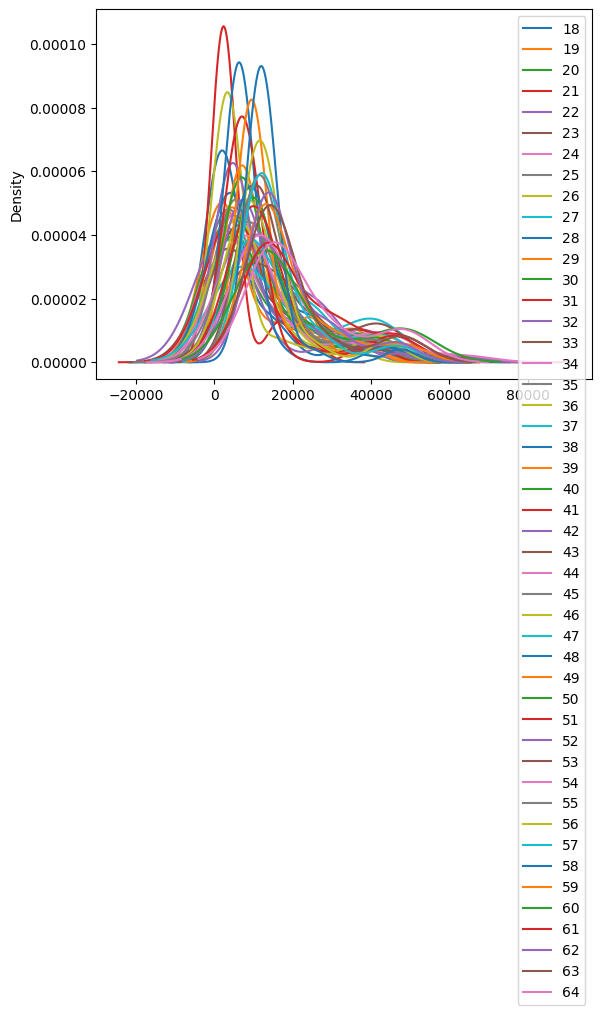

In [15]:
data.groupby(["age"])["charges"].plot(kind="kde",legend=True)

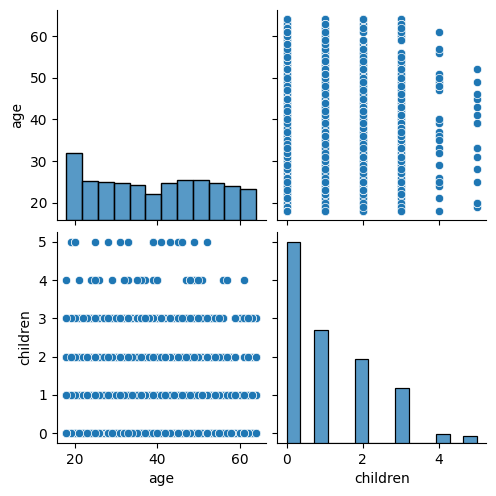

In [16]:
sns.pairplot(data.select_dtypes(include=["int64"]))

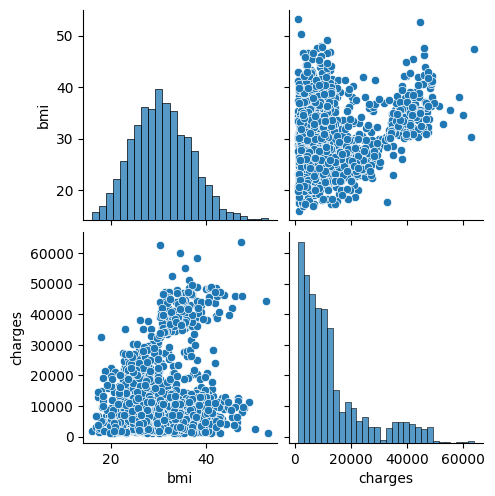

In [17]:
sns.pairplot(data.select_dtypes(include=["float64"]))

In [18]:
data.isna().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [19]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='age'>

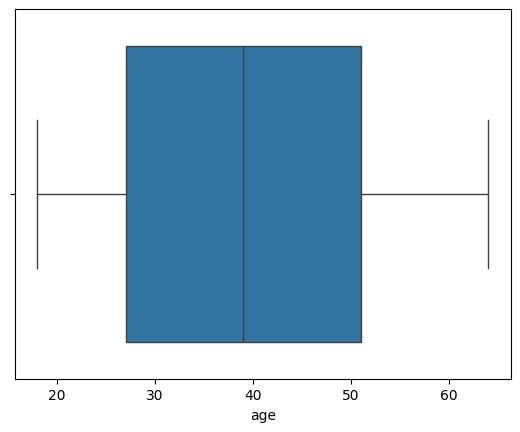

In [20]:
# check the outlier from statistical step we found that age , charges:

sns.boxplot(x=data["age"])

#then there are not outlier in age column

<Axes: xlabel='age'>

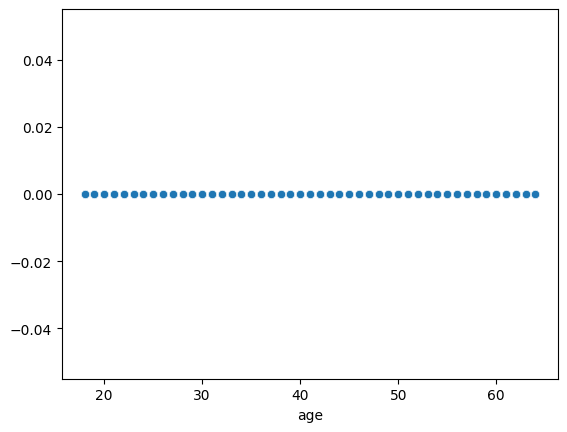

In [21]:
sns.scatterplot(x=data["age"],y=np.zeros_like(data["age"]))

<Axes: xlabel='charges'>

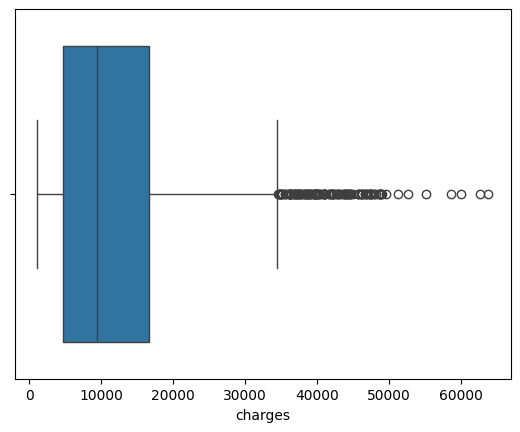

In [22]:
# check if there outlier in charges:

sns.boxplot(x=data["charges"])

# then there are outliers

<Axes: xlabel='charges'>

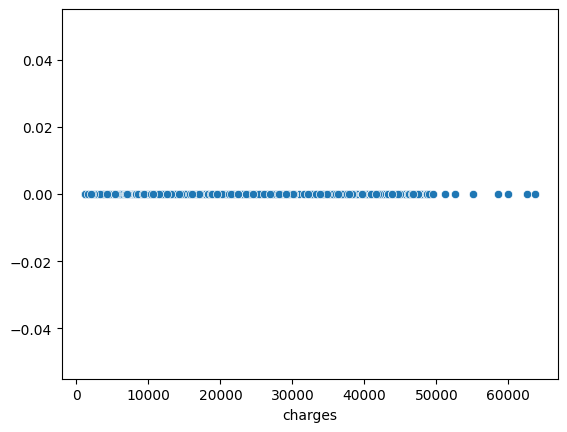

In [23]:
sns.scatterplot(x=data["charges"],y=np.zeros_like(data["charges"]))

In [24]:
# calc the outliers in the charges column:

Q1,Q3=data["charges"].quantile([0.25,0.75])

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

outliers=[]

for x in data["charges"]:
    if((x<low_limit) or (x>upper_limit)):
        outliers.append(x)

In [25]:
print("Q1_charges=",Q1)
print("Q3_charges=",Q3)
print("low_limit_charges=",low_limit)
print("upper_limit_charges=",upper_limit)
print("outliers=",outliers)


Q1_charges= 4740.28715
Q3_charges= 16639.912515
low_limit_charges= -13109.1508975
upper_limit_charges= 34489.350562499996
outliers= [39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.13561, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761, 39241.442, 42969.8527, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.8

In [26]:
print(len(outliers))

139


In [27]:
num_cols=data.select_dtypes("number").columns

In [28]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))
selector.get_support(indices=True)

array([0, 1, 2, 3])

In [29]:
num_cols[selector.get_support(indices=True)]

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [30]:
df=data.T
duplicates_features=df.duplicated().sum()
print(duplicates_features)


0


In [31]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
# the most categorical features are correlated:

from sklearn.feature_selection import SelectKBest ,f_classif

fs=SelectKBest(score_func=f_classif,k=3)
fs.fit(data.drop(columns="charges").select_dtypes("number").fillna(0),data["charges"])



/home/abdalrahman/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


SelectKBest(k=3)

In [34]:
print(["{:10f}".format(p) for p in fs.pvalues_])


['  0.000000', '  0.000000', '  0.000000']


In [35]:
print(["{:10f}".format(p) for p in fs.scores_])

['       inf', '       inf', '       inf']


In [36]:
pvalues_features=pd.DataFrame(fs.pvalues_)
scores_features=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="charges").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([pvalues_features,scores_features,features],axis=1)
feature_score.columns=["pvalues_features","scores_features","input"]
feature_score

,pvalues_features,scores_features,input
0,0.0,inf,age
1,0.0,inf,bmi
2,0.0,inf,children


In [37]:
# calc correlation:
data.select_dtypes("number").corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [38]:
data.select_dtypes("number").corr(method="pearson")

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [39]:
data.select_dtypes("number").corr(method="spearman")

,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


In [40]:
data.select_dtypes("number").corr(method="kendall")

,age,bmi,children,charges
age,1.000000,0.073273,0.043253,0.475302
bmi,0.073273,1.000000,0.011562,0.082524
children,0.043253,0.011562,1.000000,0.103107
charges,0.475302,0.082524,0.103107,1.000000


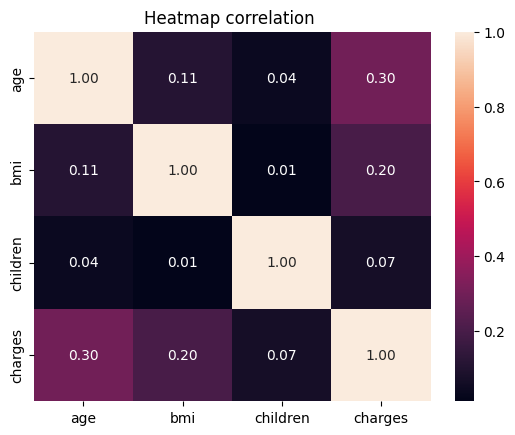

<Figure size 2000x2000 with 0 Axes>

In [41]:
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f")
plt.title("Heatmap correlation ")
plt.figure(figsize=(20,20))
plt.show()

In [42]:
# Convert object columns into Numerical Columns:

label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data


,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254
...,...,...,...,...,...,...,...
1333,32,1,276,3,0,1,746
1334,0,0,302,0,0,0,118
1335,0,0,422,0,0,2,32
1336,3,0,146,0,0,3,91


In [43]:
# Divie the data into x,y:

x=data.drop("charges",axis=1)
y=data["charges"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train

,age,sex,bmi,children,smoker,region
332,43,0,282,0,0,1
355,28,1,188,0,0,3
138,36,0,301,3,0,2
381,37,1,270,0,1,0
292,7,1,532,2,1,2
...,...,...,...,...,...,...
1095,0,0,287,4,0,0
1130,21,0,101,5,0,2
1294,40,1,131,0,0,0
860,19,0,541,2,1,3


In [45]:
model=RandomForestRegressor(max_depth=4,random_state=42,n_jobs=-1,n_estimators=100)
model.fit(x_train,y_train)     

RandomForestRegressor(max_depth=4, n_jobs=-1, random_state=42)

In [46]:
y_predict=model.predict(x_test)
y_predict[:10]

array([ 651.01912862,  418.99873965, 1147.75926651,  662.62326412,
       1204.98221535,  420.28536108,  119.9275245 ,  957.97056755,
        331.96220923,  733.30831578])

In [47]:
print(f"accuracy_model------>>>{model.score(x_test,y_test)*100:0.2f}%")

accuracy_model------>>>81.53%


In [48]:
# improve the model accuracy:
np.random.seed()
for i in range(10,110,10):
  print(f"accuracy at n_estimators {i} =")
  model2=RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
  print(f"model2 accuracy ---->>> {model2.score(x_test,y_test)*100:0.2f}%")

accuracy at n_estimators 10 =
model2 accuracy ---->>> 76.82%
accuracy at n_estimators 20 =
model2 accuracy ---->>> 77.66%
accuracy at n_estimators 30 =
model2 accuracy ---->>> 79.30%
accuracy at n_estimators 40 =
model2 accuracy ---->>> 79.09%
accuracy at n_estimators 50 =
model2 accuracy ---->>> 79.11%
accuracy at n_estimators 60 =
model2 accuracy ---->>> 79.16%
accuracy at n_estimators 70 =
model2 accuracy ---->>> 79.51%
accuracy at n_estimators 80 =
model2 accuracy ---->>> 78.83%
accuracy at n_estimators 90 =
model2 accuracy ---->>> 78.40%
accuracy at n_estimators 100 =
model2 accuracy ---->>> 78.82%
